# K-Nearest Neighbors (KNN) Classification

Load packages

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Set global figure parameters
plt.rcParams['figure.dpi'] = 80  # Set the DPI
plt.rcParams['figure.facecolor'] = 'white'  # Set the face color

Load data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [4]:
# show some information about what exactly you have imported
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# show feature names and shape of matrix
print(iris.feature_names, iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)


In [6]:
# show target names and shape of matrix
print(iris.target_names, iris.target.shape)

['setosa' 'versicolor' 'virginica'] (150,)


In [7]:
X = iris.data
y = iris.target

We can also load the data using Pandas dataframe

In [8]:
# import data again using as_frame=True
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame

In [9]:
# display some information
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [11]:
# extract data from frame in desired format
X = df.drop('target', axis=1)
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [12]:
y = df['target']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Visualising the data

<function matplotlib.pyplot.show(close=None, block=None)>

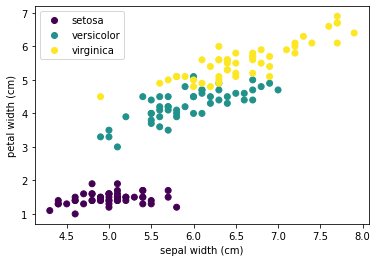

In [13]:
xy_plot = plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=y)
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles=xy_plot.legend_elements()[0], labels=list(iris.target_names))
plt.show

Training a simple machine learning model

In [14]:
# import and initialise the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [15]:
# split the dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y ,random_state=13)

In [16]:
# train the model
model.fit(Xtrain,y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluating the results

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
# make predictions with the test data
y_predicted = model.predict(Xtest)

In [19]:
# evaluate the score
score = accuracy_score(y_test, y_predicted)
print(score)

0.9473684210526315


In [20]:
# find misclassified items
X_misclass = Xtest[y_test !=y_predicted]

Make plot displaying misclassified items among the other test data

Text(0, 0.5, 'petal width (cm)')

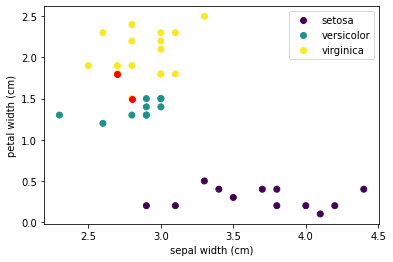

In [27]:
# plot test data (sepal width vs petal width)
plt.scatter(Xtest['sepal width (cm)'],Xtest['petal width (cm)'],c=y_test)
# plot misclassified items
plt.scatter(X_misclass['sepal width (cm)'],X_misclass['petal width (cm)'],c='r')
plt.legend(handles=xy_plot.legend_elements()[0], labels=list(iris.target_names))
#label axes
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

Text(0, 0.5, 'petal length (cm)')

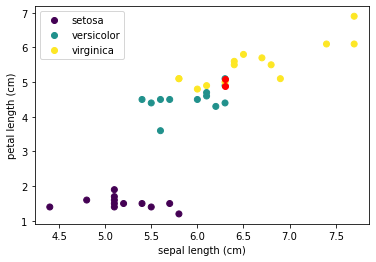

In [28]:
# move to second subplot
# plot test data (sepal length vs petal length)
plt.scatter(Xtest['sepal length (cm)'],Xtest['petal length (cm)'],c=y_predicted)
# plot misclassified items
plt.scatter(X_misclass['sepal length (cm)'],X_misclass['petal length (cm)'],c='r')
plt.legend(handles=xy_plot.legend_elements()[0], labels=list(iris.target_names))
# label axes
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')


In [24]:
# show plot
plt.show()